In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
print(tf.__version__)

2.2.0


In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-05 14:27:39--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.85MB/s    in 61s     

2020-07-05 14:28:41 (5.09 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [46]:
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_dir)
validation_dir = os.path.join(base_dir,)

In [47]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images/')

['scissors', 'paper', 'rock', 'README_rpc-cv-images.txt']

In [50]:
train_rock_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/rock')
train_paper_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/paper')
train_scissors_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/scissors')

validation_rock_dir = os.path.join('/tmp/rockpaperscissors/rock')
validation_paper_dir = os.path.join('/tmp/rockpaperscissors/paper')
validation_scissors_dir = os.path.join('/tmp/rockpaperscissors/scissors')

print('total training rock images:', len(os.listdir(train_rock_dir)))
print('total training paper images:', len(os.listdir(train_paper_dir)))
print('total training scissors images:', len(os.listdir(train_scissors_dir)))

print('total validation rock images:', len(os.listdir(validation_rock_dir)))
print('total validation paper images:', len(os.listdir(validation_paper_dir)))
print('total validation scissors images:', len(os.listdir(validation_scissors_dir)))

train_rock_files = os.listdir(train_rock_dir)
validation_rock_files = os.listdir(validation_rock_dir)
print(train_rock_files[:5])
print(validation_rock_files[:5])

train_paper_files = os.listdir(train_paper_dir)
validation_paper_files = os.listdir(validation_paper_dir)
print(train_paper_files[:5])
print(validation_paper_files[:5])

train_scissors_files = os.listdir(train_scissors_dir)
validation_scissors_files = os.listdir(validation_scissors_dir)
print(train_scissors_files[:5])
print(validation_scissors_files[:5])

total training rock images: 726
total training paper images: 712
total training scissors images: 750
total validation rock images: 726
total validation paper images: 712
total validation scissors images: 750
['IR0TvCNLcK7IrE1a.png', 'eGm3dLnWBxRrjlJX.png', 'OavUnCwAEACzIK0A.png', '8xToYACSoKU0swum.png', 'NlFsco3hpee3X0wS.png']
['IR0TvCNLcK7IrE1a.png', 'eGm3dLnWBxRrjlJX.png', 'OavUnCwAEACzIK0A.png', '8xToYACSoKU0swum.png', 'NlFsco3hpee3X0wS.png']
['qRNjm8INtwezm9Yd.png', 'e96cq72UJTICTkE0.png', '9bQFlg61mt0akPoM.png', 'b15QGB4XPECDemV5.png', '27XFtQjjXQ8AP8Tl.png']
['qRNjm8INtwezm9Yd.png', 'e96cq72UJTICTkE0.png', '9bQFlg61mt0akPoM.png', 'b15QGB4XPECDemV5.png', '27XFtQjjXQ8AP8Tl.png']
['1yDUM1w2HTbuPIfO.png', 'yAEtN7WUvS5S1Cmy.png', 'OWzxS6m9SGpk1bnY.png', '1VRzspyXpQ6A2rKy.png', 's3L79HfHyX9tyTS0.png']
['1yDUM1w2HTbuPIfO.png', 'yAEtN7WUvS5S1Cmy.png', 'OWzxS6m9SGpk1bnY.png', '1VRzspyXpQ6A2rKy.png', 's3L79HfHyX9tyTS0.png']


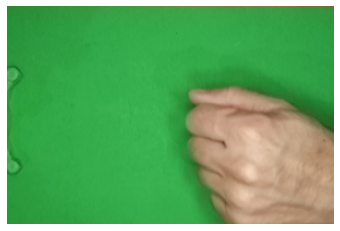

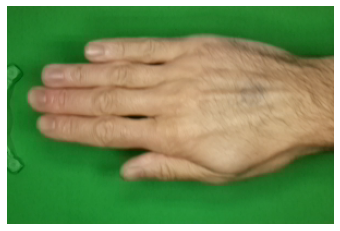

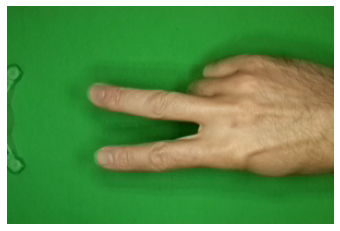

In [51]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 1

next_rock = [os.path.join(train_rock_dir, fname) 
                for fname in train_rock_files[pic_index-1:pic_index]]
next_paper = [os.path.join(train_paper_dir, fname) 
                for fname in train_paper_files[pic_index-1:pic_index]]
next_scissors = [os.path.join(train_scissors_dir, fname) 
                for fname in train_scissors_files[pic_index-1:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [52]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rockpaperscissors/rps-cv-images/"
train_datagen = ImageDataGenerator (
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

VALIDATION_DIR = "/tmp/rockpaperscissors/rps-cv-images/"
validation_datagen = ImageDataGenerator (rescale = 1./255)

In [72]:
train_generator = train_datagen.flow_from_directory (
    TRAINING_DIR,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 20)

validation_generator = validation_datagen.flow_from_directory (
    VALIDATION_DIR,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 20)

Found 2188 images belonging to 3 classes.
Found 2188 images belonging to 3 classes.


In [73]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [74]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 15, 15, 128)      

In [75]:
model.compile (loss = 'categorical_crossentropy',
               optimizer = 'rmsprop',
               metrics = ['accuracy'])

In [76]:
history = model.fit (train_generator,
                     steps_per_epoch = 25,
                     epochs = 20,
                     validation_data = validation_generator,
                     verbose = 1,
                     validation_steps = 5)
model.save("rps.h5")

Epoch 1/20
25/25 [==============================] - 34s 1s/step - loss: 1.3885 - accuracy: 0.3217 - val_loss: 1.1023 - val_accuracy: 0.3300
Epoch 2/20
25/25 [==============================] - 35s 1s/step - loss: 1.1014 - accuracy: 0.4000 - val_loss: 1.0914 - val_accuracy: 0.2600
Epoch 3/20
25/25 [==============================] - 35s 1s/step - loss: 1.1253 - accuracy: 0.4640 - val_loss: 0.9751 - val_accuracy: 0.6700
Epoch 4/20
25/25 [==============================] - 35s 1s/step - loss: 0.9522 - accuracy: 0.5697 - val_loss: 1.0321 - val_accuracy: 0.5700
Epoch 5/20
25/25 [==============================] - 35s 1s/step - loss: 0.9448 - accuracy: 0.5881 - val_loss: 0.6135 - val_accuracy: 0.7800
Epoch 6/20
25/25 [==============================] - 35s 1s/step - loss: 0.7526 - accuracy: 0.6740 - val_loss: 0.3507 - val_accuracy: 0.9000
Epoch 7/20
25/25 [==============================] - 35s 1s/step - loss: 0.7468 - accuracy: 0.6860 - val_loss: 0.4097 - val_accuracy: 0.9000
Epoch 8/20
25/25 [==

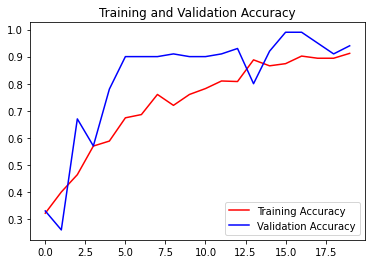

<Figure size 432x288 with 0 Axes>

In [77]:
import matplotlib.pyplot as plt
acc = history.history ['accuracy']
val_acc = history.history ['val_accuracy']
loss = history.history ['loss']
val_loss = history.history ['val_loss']

epochs = range (len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Saving zXY93m62vUNIH4a0.png to zXY93m62vUNIH4a0 (1).png
zXY93m62vUNIH4a0.png
rock


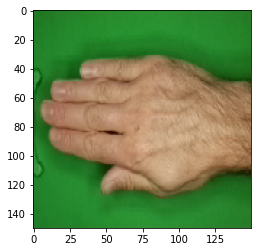

In [93]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes [0][0] == 1 :
    print('rock')
  elif classes [0][1] == 1 :
    print('paper')
  elif classes [0][2] == 1 :
    print('scissors')
  else :
    print('unknown')

0.0
